In [1]:
# Data management and investigation
import pandas as pd

import numpy as np
# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

## Explore data

In [3]:
df_19 = pd.read_csv("df_19.csv")

In [4]:
list(df_19)

['no',
 'name',
 'state',
 'type',
 'customers',
 'saidi_nomed',
 'saifi_nomed',
 'caidi_nomed',
 'pv_mw',
 'pv_storage_mw',
 'virtual_mw',
 'wind_mw',
 'all_tech_mw',
 'ee_savings_mw',
 'peak_savings_mw',
 'dem_res_customers',
 'dem_res_savings_mwh']

In [250]:
X = df_19[['customers','pv_mw','dem_res_savings_mwh']] # PREDICTORS: simplified for our purposes
y = df_19['saidi_nomed']
X['customers'] = np.log(X['customers'])

In [251]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)

In [252]:
train_X.describe()

,customers,pv_mw,dem_res_savings_mwh
count,577.000000,577.000000,577.000000
mean,10.321265,30.554345,1976.299374
std,1.600947,224.864116,40736.494196
min,5.834811,0.000000,0.000000
25%,9.310638,0.006000,0.000000
50%,10.102666,0.360000,0.000000
75%,10.998109,2.220000,0.000000
max,15.536377,4265.184000,977215.000000


In [253]:
scaler = pp.MinMaxScaler()
col_names = list(train_X) # save the column names because the scaler makes it into a numpy array
train_X = scaler.fit_transform(train_X)
train_X = pd.DataFrame(train_X,columns=col_names)

In [254]:
train_X.describe()

,customers,pv_mw,dem_res_savings_mwh
count,577.000000,577.000000,577.000000
mean,0.462446,0.007164,0.002022
std,0.165019,0.052721,0.041686
min,0.000000,0.000000,0.000000
25%,0.358275,0.000001,0.000000
50%,0.439914,0.000084,0.000000
75%,0.532213,0.000520,0.000000
max,1.000000,1.000000,1.000000


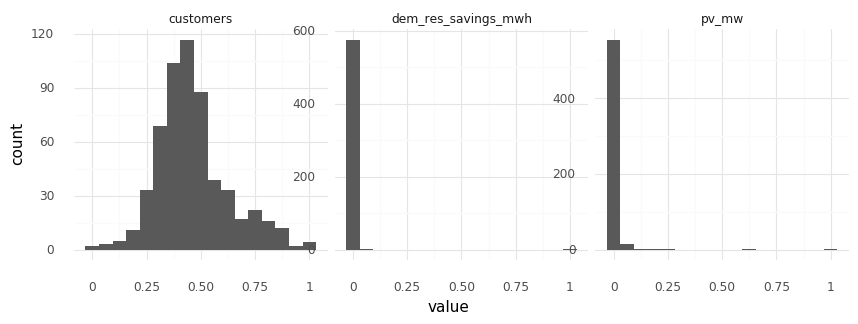

<ggplot: (8781874671301)>

In [255]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 